Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


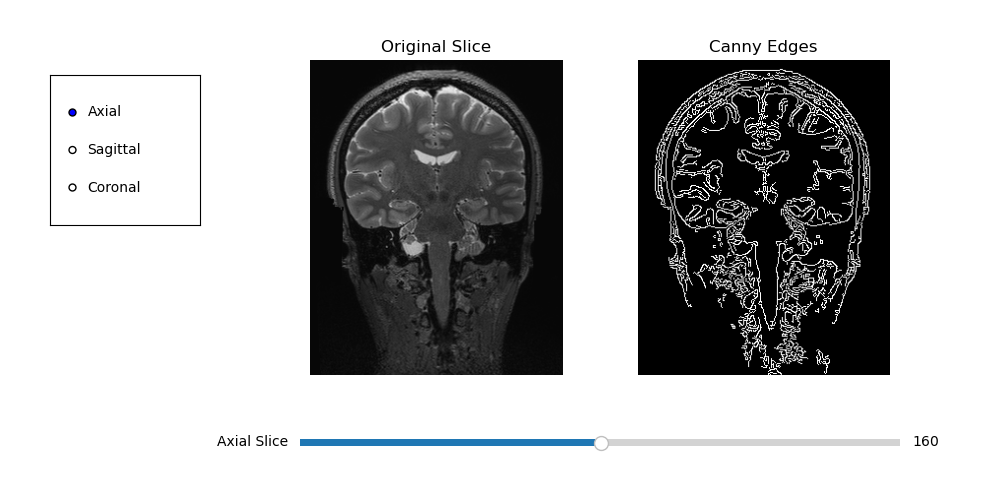

In [9]:
%pip install opencv-python
%pip install pyvista
%pip install ipympl

%matplotlib widget

import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

def load_volume(filename: str, shape=(320, 320, 256), dtype=np.float32) -> np.ndarray:
    with open(filename, 'rb') as f:
        volume = np.fromfile(f, dtype=dtype).reshape(shape)
    return volume

def get_slice(volume: np.ndarray, axis: int, index: int) -> np.ndarray:
    if axis == 0:
        slice_2d = volume[index, :, :]
    elif axis == 1:
        slice_2d = volume[:, index, :]
    elif axis == 2:
        slice_2d = volume[:, :, index]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")
    return ((slice_2d - np.min(slice_2d)) / np.ptp(slice_2d) * 255).astype(np.uint8)

def apply_canny(img: np.ndarray, low_thresh=50, high_thresh=150) -> np.ndarray:
    return cv2.Canny(img, low_thresh, high_thresh)

filename = "T2.raw"
shape = (320, 320, 256)
volume = load_volume(filename, shape)

axis = 0
slice_index = shape[axis] // 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.3, bottom=0.25)

img = get_slice(volume, axis, slice_index)
edges = apply_canny(img)

im1 = ax1.imshow(img, cmap='gray')
ax1.set_title("Original Slice")
ax1.axis("off")

im2 = ax2.imshow(edges, cmap='gray')
ax2.set_title("Canny Edges")
ax2.axis("off")

radio_ax = plt.axes([0.05, 0.55, 0.15, 0.3])
radio = RadioButtons(radio_ax, ('Axial', 'Sagittal', 'Coronal'))

slider_ax = plt.axes([0.3, 0.1, 0.6, 0.03])
slider = Slider(slider_ax, f'{["Axial", "Sagittal", "Coronal"][axis]} Slice',
                0, shape[axis] - 1, valinit=slice_index, valstep=1)

def update(val):
    idx = int(slider.val)
    new_img = get_slice(volume, axis, idx)
    new_edges = apply_canny(new_img)

    im1.set_data(new_img)
    im2.set_data(new_edges)
    ax1.set_title(f"{['Axial', 'Sagittal', 'Coronal'][axis]} Slice {idx}")
    fig.canvas.draw_idle()

def change_axis(label):
    global axis
    axis = {'Axial': 0, 'Sagittal': 1, 'Coronal': 2}[label]
    slider.label.set_text(f'{label} Slice')
    slider.valmax = shape[axis] - 1
    slider.ax.set_xlim(0, shape[axis] - 1)
    slider.set_val(shape[axis] // 2)  

slider.on_changed(update)
radio.on_clicked(change_axis)

plt.show()


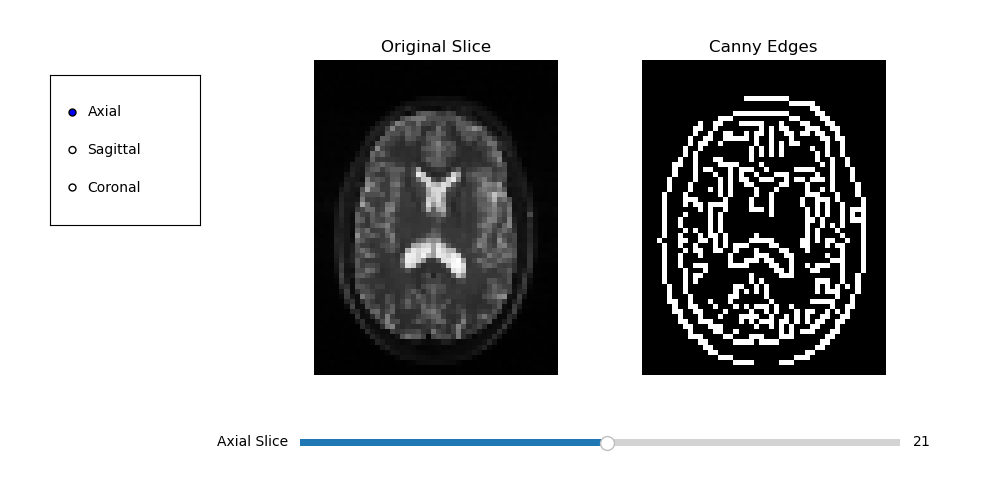

In [10]:
%matplotlib widget
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

def load_volume2(filename: str, shape=(42, 62, 48), dtype=np.uint8) -> np.ndarray:
    with open(filename, 'rb') as f:
        volume = np.fromfile(f, dtype=dtype).reshape(shape)
    return volume

def get_slice(volume: np.ndarray, axis: int, index: int) -> np.ndarray:
    if axis == 0:
        slice_2d = volume[index, :, :]
    elif axis == 1:
        slice_2d = volume[:, index, :]
    elif axis == 2:
        slice_2d = volume[:, :, index]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")
    return ((slice_2d - np.min(slice_2d)) / np.ptp(slice_2d) * 255).astype(np.uint8)

def apply_canny(img: np.ndarray, low_thresh=50, high_thresh=150) -> np.ndarray:
    return cv2.Canny(img, low_thresh, high_thresh)

filename2 = "HeadMRVolume.raw"
shape2 = (42, 62, 48)  # Z, Y, X
volume2 = load_volume2(filename2, shape2)
axis2 = 0
slice_index2 = shape2[axis2] // 2

img2 = get_slice(volume2, axis2, slice_index2)
edges2 = apply_canny(img2)

fig2, (axi1, axi2) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.3, bottom=0.25)

img_disp = axi1.imshow(img2, cmap='gray')
axi1.set_title("Original Slice")
axi1.axis("off")

edge_disp = axi2.imshow(edges2, cmap='gray')
axi2.set_title("Canny Edges")
axi2.axis("off")

radio_ax2 = plt.axes([0.05, 0.55, 0.15, 0.3])
radio2 = RadioButtons(radio_ax2, ('Axial', 'Sagittal', 'Coronal'))

slider_ax2 = plt.axes([0.3, 0.1, 0.6, 0.03])
slider2 = Slider(slider_ax2, f'{["Axial", "Sagittal", "Coronal"][axis2]} Slice',
                 0, shape2[axis2]-1, valinit=slice_index2, valstep=1)

def update2(val):
    idx = int(slider2.val)
    new_img = get_slice(volume2, axis2, idx)
    new_edges = apply_canny(new_img)

    img_disp.set_data(new_img)
    edge_disp.set_data(new_edges)

    axi1.set_title(f"Original - {['Axial', 'Sagittal', 'Coronal'][axis2]} {idx}")
    axi2.set_title(f"Canny Edges - {['Axial', 'Sagittal', 'Coronal'][axis2]} {idx}")
    fig2.canvas.draw_idle()

def axis_change2(label):
    global axis2
    axis2 = {'Axial': 0, 'Sagittal': 1, 'Coronal': 2}[label]
    new_max = shape2[axis2] - 1

    slider2.label.set_text(f'{label} Slice')
    slider2.valmax = new_max
    slider2.ax.set_xlim(0, new_max)
    slider2.set_val(min(slider2.val, new_max))  

radio2.on_clicked(axis_change2)
slider2.on_changed(update2)

plt.show()




Note: you may need to restart the kernel to use updated packages.


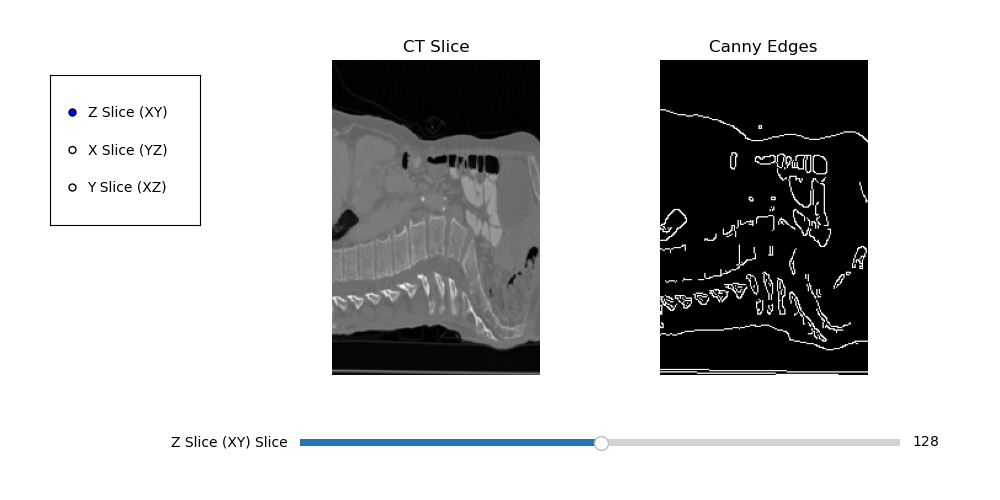

In [11]:
%pip install pyvista opencv-python
%matplotlib widget

import pyvista as pv
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

vtk_path3 = "ctscan_ez.vtk"
vtk_grid3 = pv.read(vtk_path3)
ct_data3 = vtk_grid3.point_data[vtk_grid3.point_data.keys()[0]]  
ct_shape3 = vtk_grid3.dimensions 
ct_volume3 = ct_data3.reshape(ct_shape3, order="F") 

def extract_slice3(volume_array3, axis_index3, slice_num3):
    if axis_index3 == 0:
        slice_2d = volume_array3[slice_num3, :, :]
    elif axis_index3 == 1:
        slice_2d = volume_array3[:, slice_num3, :]
    elif axis_index3 == 2:
        slice_2d = volume_array3[:, :, slice_num3]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")
    return ((slice_2d - np.min(slice_2d)) / np.ptp(slice_2d) * 255).astype(np.uint8)

def run_canny3(image_slice3):
    return cv2.Canny(image_slice3, 100, 200)

display_axis3 = 0
slice_idx3 = ct_volume3.shape[display_axis3] // 2

slice_img3 = extract_slice3(ct_volume3, display_axis3, slice_idx3)
edges_img3 = run_canny3(slice_img3)

fig3, (left_ax3, right_ax3) = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(left=0.3, bottom=0.25)

left_img3 = left_ax3.imshow(slice_img3, cmap='gray')
left_ax3.set_title("CT Slice")
left_ax3.axis("off")

right_img3 = right_ax3.imshow(edges_img3, cmap='gray')
right_ax3.set_title("Canny Edges")
right_ax3.axis("off")

radio_ax3 = plt.axes([0.05, 0.55, 0.15, 0.3])
radio3 = RadioButtons(radio_ax3, ('Z Slice (XY)', 'X Slice (YZ)', 'Y Slice (XZ)'))

slider_ax3 = plt.axes([0.3, 0.1, 0.6, 0.03])
slice_slider3 = Slider(slider_ax3, f'{["Z Slice (XY)", "X Slice (YZ)", "Y Slice (XZ)"][display_axis3]} Slice',
                       0, ct_volume3.shape[display_axis3] - 1,
                       valinit=slice_idx3, valstep=1)

def update_display3():
    idx3 = int(slice_slider3.val)
    new_slice3 = extract_slice3(ct_volume3, display_axis3, idx3)
    new_edges3 = run_canny3(new_slice3)

    left_img3.set_data(new_slice3)
    right_img3.set_data(new_edges3)

    left_ax3.set_title(f"{['Z Slice (XY)','X Slice (YZ)','Y Slice (XZ)'][display_axis3]} Slice {idx3}")
    right_ax3.set_title("Canny Edges")
    fig3.canvas.draw_idle()

def on_slider_change3(val):
    update_display3()

def on_axis_change3(label3):
    global display_axis3
    display_axis3 = {'Z Slice (XY)': 0, 'X Slice (YZ)': 1, 'Y Slice (XZ)': 2}[label3]
    new_max3 = ct_volume3.shape[display_axis3] - 1

    slice_slider3.label.set_text(f'{label3} Slice')
    slice_slider3.valmax = new_max3
    slice_slider3.ax.set_xlim(0, new_max3)
    slice_slider3.set_val(min(slice_slider3.val, new_max3))  

radio3.on_clicked(on_axis_change3)
slice_slider3.on_changed(on_slider_change3)

plt.show()
